2020-04-29 15:46:33 
Description

2020-03-20 17:15:06 

<font size="3"><b> Exprimental Setting </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. In most cases, I found other Kl scaling factor to be detrimental to MNIST data. In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Partial complete retraining:</b> To avoid classification error for both training and test creaping up after 10-15 epochs. I <font color="red">retrain the model from scratch after every 13 epochs</font>. This is why you see an increase in the classification error after every 13th epoch. Albeit, this is another important step.</li>
    <li><b>Number of MCMC samples</b>: 5</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.25</li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# import mpld3
from matplotlib import rc
import numpy as np
import pandas as pd
import os
# supposed to help make graphs interactive, to zoom in, but does not work
# mpld3.enable_notebook()

In [4]:
plot_pth = 'McDropoutVsBayesianVariationRatio/'
class getMetric():

    def __init__(self, type, pth, truncate):
        self.files = [f for f in os.listdir(pth)]
        self.files = sorted(self.files, key=lambda x: int(x.split('round')[1].split('.csv')[0]))
        if type == 'accuracy':
            indx = 10
        # classification error
        if truncate == None:
            self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:40]
        else: 
            self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:truncate]

def PlotGraph(figure_nam,data_locs,labels,truncate=None,x_l=None,y_l=None):
    metric_list = [getMetric('accuracy',pth,truncate).metric for pth in data_locs]
    rounds = range(len(metric_list[0]))
    colors = ['#9B59B6','#76D7C4','#F5B041','#E74C3C','#2C3E50']
    markers = ['o','o','o','^','^']
#     markers = ['','','','','']
    font = {'family': 'Serif',
            'weight': 'normal',
            'size': 14}
    rc('font', **font)
    if not figure_nam:
        figure_nam = 'my_fig.png'
    fig = plt.figure(num=1, figsize=(14, 7))
    ax = plt.axes()
    for i,m in enumerate(metric_list):
        ax.plot(rounds, m, marker=markers[i], color=colors[i], label=labels[i])
    if x_l:
        ax.set_xlim(x_l)
    if y_l:
        ax.set_ylim(y_l)
    ax.set_ylabel('classification error', fontsize=18)
    ax.set_xlabel(r'# samples ($\times 50$)', fontsize=18)
    ax.legend(loc=1, ncol=1, frameon=True)
    plt.savefig(plot_pth+figure_nam, orientation='portrait', bbox_inches='tight', dpi=300)

<h2 align="center">MNIST data</h2>

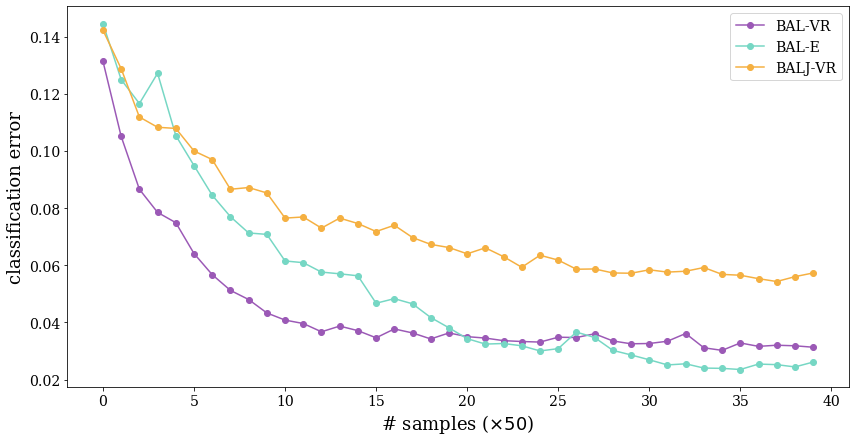

In [6]:
# 500 initial samples

# bayesian results
pth_1 = '../results_archive/FBlenet300-100_mnist_isample500_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_2 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
pth_3 = '../results/Blenet300-100_mnist_isample500_e40_r40_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-Adam_variation-ratio_rtAfter40/'
locs = [pth_1, pth_2, pth_3]
labels = ['BAL-VR','BAL-E', 'BALJ-VR']
f_name = 'fig_a'
PlotGraph(f_name,locs,labels)

In [1]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac0_retrain0/'
# bayesian results
pth_4 = '../results_archive/FBlenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/FBlenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_b'
PlotGraph(f_name,locs,labels)

NameError: name 'PlotGraph' is not defined

<p>From the results, one can observe that the bayesian version of active learning performs better than the frequentist coutner part. We don't see any major difference in the first 10-15 rounds. However, the Bayesian active learning starts to outperform both AL-VR and AL-E after around 15th round. Consistent with the CVPR paper, the variation-ratio seems to be the best metric for uncertainty calculation. This is also in the case of bayesian NN.</p>

<b><p style="font-size:20px">Retraining from Scratch Does not Work for Active Learning</p></b>
    <p>To validate this outcome, I retraining from scratch after every round and compared against partial retraining (i.e., after 10 rounds). The following graph shows this outcome. I am only showing the outcome for McDropout, but I noticed that this was the case for even Bayesian NN. Here, RtAfter1 implies, we retrain after every single round.</p>

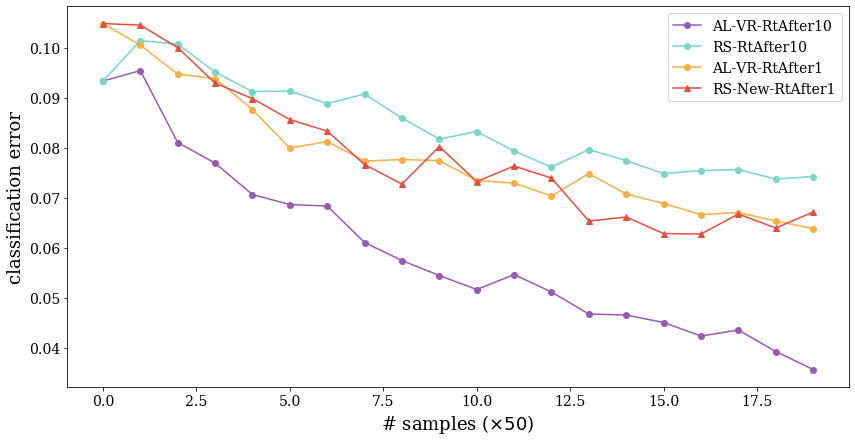

In [7]:
# 1000 initial samples retraining from scratch is clearly not leading to god results for active learning
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac0_retrain0/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r20_ac1_top-k100_b32_rtAfter1_variation-ratio/'
pth_4 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r20_ac0_top-k100_b32_rtAfter1/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR-RtAfter10','RS-RtAfter10','AL-VR-RtAfter1','RS-New-RtAfter1']
f_name = 'fig_k'
PlotGraph(figure_nam=f_name,data_locs=locs,labels=labels,truncate=20)

2020-03-30 18:11:59 
<h2 align="center">Fashion MNIST data</h2>

<font size="3"><b> Exprimental Setting for Bayesian NN </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. Unlike, MNIST, Fashion MNIST seems to more robust when scaling KL with blundell-based scaling factor. However, the results lag behind the McDropout. The negative effect of using this regularizer can be seen the graphs, where there are multiple peaks indicating the increase of classification error (due to re-training). In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>No retraining for any round:</b> This is a major change from previous results</li>
    <li><b>Number of MCMC samples</b>: 20</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
    <li><b>Number of NN instantiations</b>: To estimate Variation-Ratio and Entropy, we sample the Bayesian NN 25 times. Although I found just 10 samples to be sufficient.</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.25</li>
<li><b>Partial complete retraining</b>:Similar to the bayesian NN, we retrain the model from scratch after 10 epochs.<li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

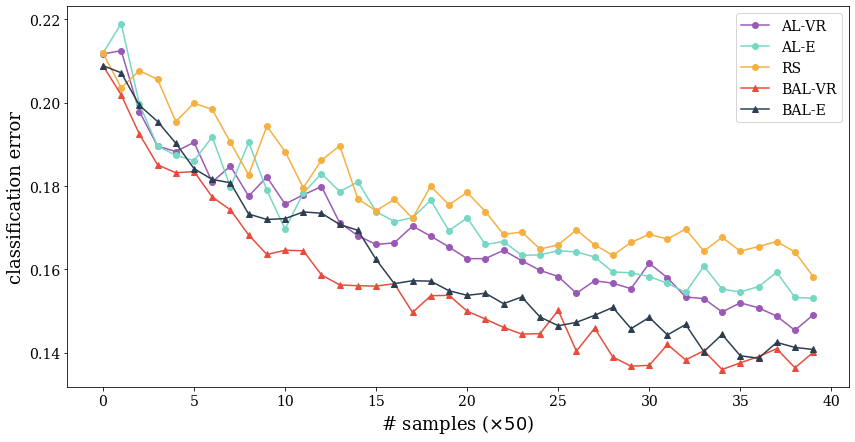

In [15]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/FBlenet300-100_fmnist_isample500_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/FBlenet300-100_fmnist_isample500_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_c'
PlotGraph(f_name,locs,labels)

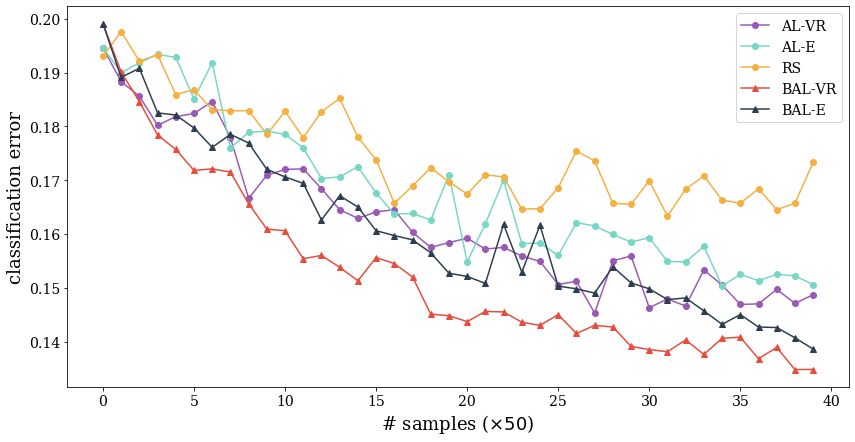

In [7]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/FBlenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/FBlenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)

<p>Unlike MNIST, for Fashion MNIST data, which is more challenging, Bayesian active learning with Variation-Ratio starts to outperform AL-VR and AL-E at an early stage (around th rounds on wards). However one can observe that towards round 30, <font color="red">there is a major increase in the classification error, this is because of the retraining and we need to report this in a different way.</color></p>

2020-04-12 12:33:00 
<h1 align="center"> <a href="https://engmrk.com/lenet-5-a-classic-cnn-architecture/"> Lenet 5 </a></h1>

<font size="3"><b> Exprimental Setting for Bayesian NN </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. Unlike, MNIST, Fashion MNIST seems to more robust when scaling KL with blundell-based scaling factor. However, the results lag behind the McDropout. The negative effect of using this regularizer can be seen the graphs, where there are multiple peaks indicating the increase of classification error (due to re-training). In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>No retraining:</b> <font color="red">Unlike the dense layers, in Lenet5 I don't retrain from scratch</font>. This is mainly due to the change in the way I calculate KL in bayesian layers. I never found the classification accuracy to drop. Additionally, I found retraining from scratch was detrimental to the performance.</li>
    <li><b>Number of MCMC samples</b>: 20</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
    <li>(no retraining leads to better result)</li>
    <li><b>Number of NN instantiations</b>: To estimate Variation-Ratio and Entropy, we sample the Bayesian NN 25 times.</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li> <b>Dropout Rate</b>: 0.5 for the last 3 dense layers and 0.25 for the convolution layers</li>
<li><b>Partial complete retraining</b>:We retrain the model from scratch after 10 epochs.<li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

<h2 align="center">MNIST data</h2>

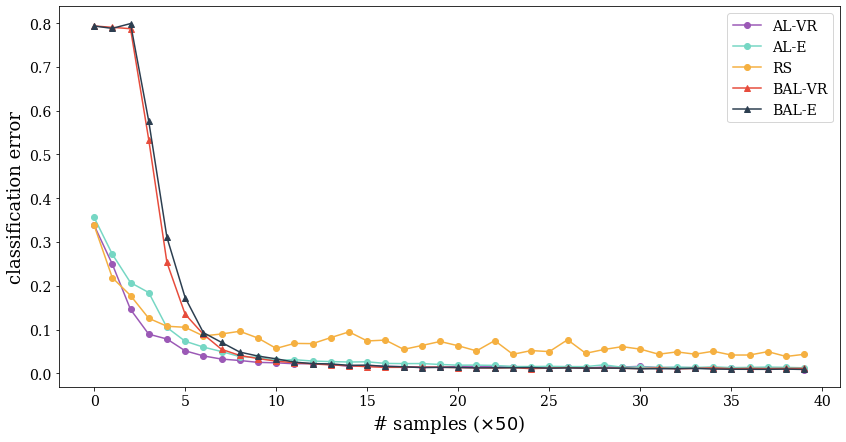

In [3]:
# 50 initial samples
pth_1 = '../results_archive/McDropout/lenet5_mnist_isample50_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_mnist_isample50_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet5_mnist_isample50_e20_r40_ac0_b32_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_mnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Lenet5Hybrid_mnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_e'
PlotGraph(f_name,locs,labels)

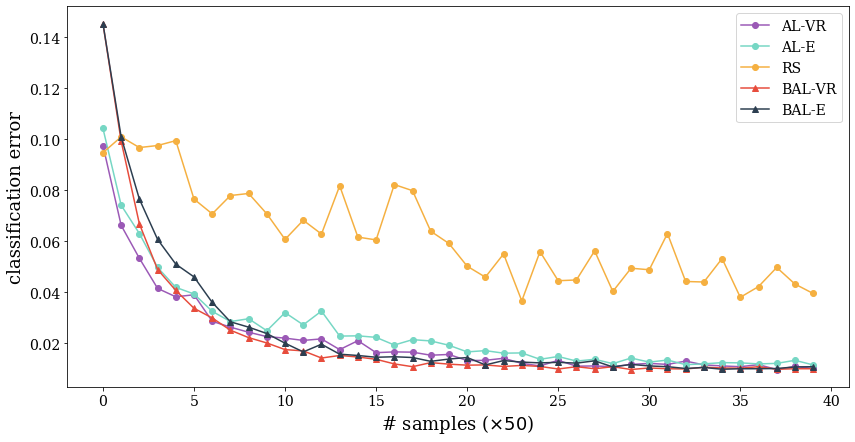

In [4]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet5_mnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_mnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet5_mnist_isample500_e20_r40_ac0_b32_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Lenet5Hybrid_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_f'
PlotGraph(f_name,locs,labels)

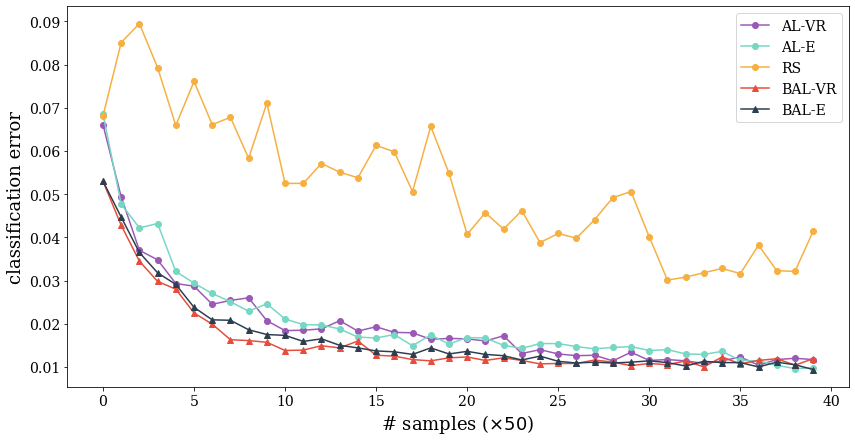

In [5]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet5_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_mnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet5_mnist_isample1000_e20_r40_ac0_b32_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_mnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Lenet5Hybrid_mnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_g'
PlotGraph(f_name,locs,labels)

<h2 align="center">Fashion MNIST data</h2>

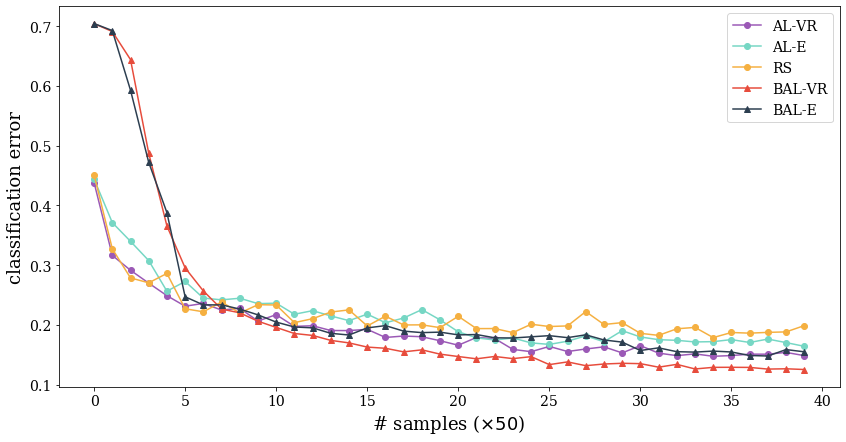

In [6]:
# 50 initial samples
pth_1 = '../results_archive/McDropout/lenet5_fmnist_isample50_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_fmnist_isample50_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet5_fmnist_isample50_e20_r40_ac0_b32_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_fmnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Lenet5Hybrid_fmnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_h'
PlotGraph(f_name,locs,labels)

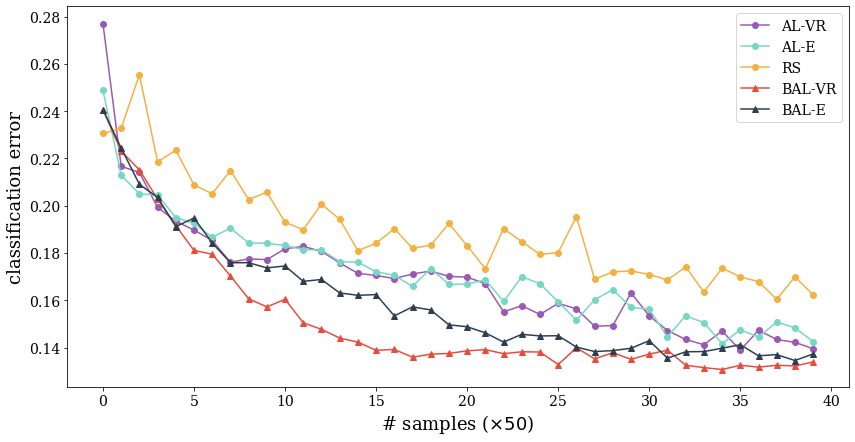

In [7]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet5_fmnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_fmnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet5_fmnist_isample500_e20_r40_ac0_b32_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Lenet5Hybrid_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_i'
PlotGraph(f_name,locs,labels)

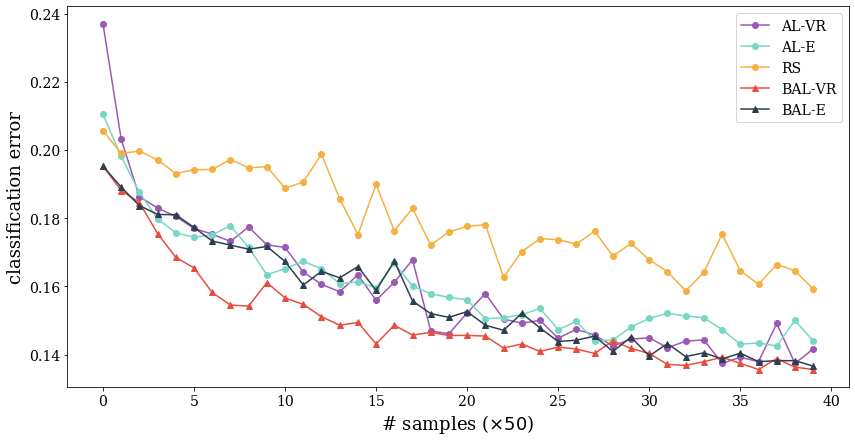

In [8]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet5_fmnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_fmnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet5_fmnist_isample1000_e20_r40_ac0_b32_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_fmnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Lenet5Hybrid_fmnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_j'
PlotGraph(f_name,locs,labels)

<h2 align="center"> Cifar10 Dataset </h2>
<font size="3">Model Type:<b>Alexnet</b> program file name <b>TrainSimpleDropout_v2_beta.py</b></font>

<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li> <b>Dropout Rate</b>: 0.5 for the last 3 dense layers and 0.25 for the convolution layers</li>
<li> <b># Batchs Per-Round</b>:In each round, we add 500 samples (when compared to just 100 in MNIST and FMNIST)</li>
<li><b>Training Methodology</b>:We retrain the model from scratch after <b> each round </b></li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
<li>At each round we randomly allocate 10% of the training data as validation. We adopt an early stopping criteria, where we choose the parameters that result in the best accuracy for this validation set.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

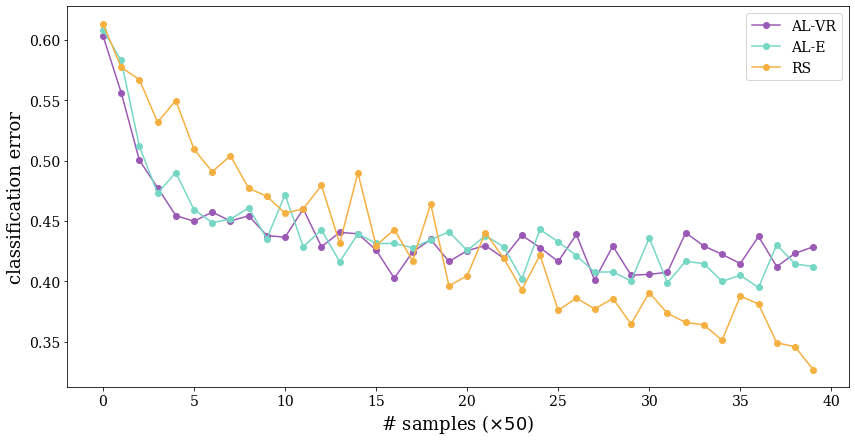

In [13]:
# 1000 initial samples
pth_1 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r70_ac1_top-k500_b32_rtAfter1_variation-ratio/'
pth_2 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r70_ac1_top-k500_b32_rtAfter1_entropy/'
pth_3 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r70_ac0_top-k500_b32_rtAfter1/'
locs = [pth_1, pth_2, pth_3]
labels = ['AL-VR','AL-E','RS']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels)

The following are some tests - tmp, delete it later

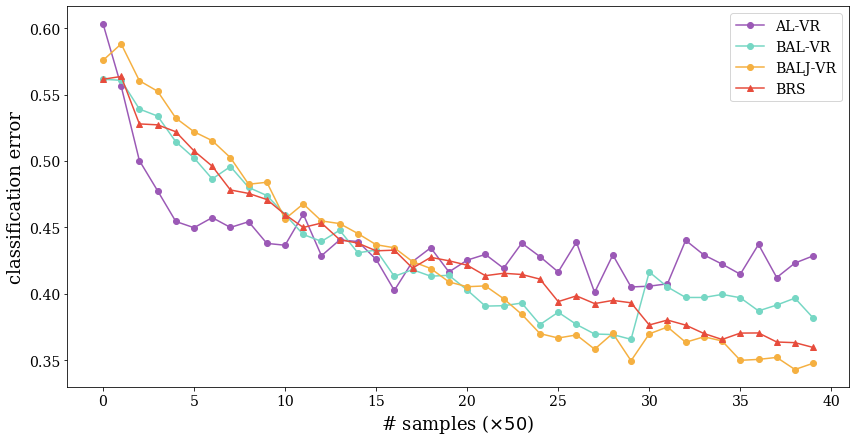

In [10]:
# 1000 initial samples
pth_1 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r70_ac1_top-k500_b32_rtAfter1_variation-ratio/'
pth_2 = '../results/AlexnetHybrid_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b100_mcmc10_netType-blundelloptim-adam_variation-ratio_rtAfter10/'
pth_3 = '../results/AlexnetHybrid_cifar10_isample1000_e40_r100_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-adam_variation-ratio_rtAfter10/'
pth_4 = '../results/AlexnetHybrid_cifar10_isample1000_e40_r100_ac0_Klreg-standard2_b100_mcmc10_netType-blundelloptim-adamvariation-ratio_rtAfter10/'
locs = [pth_1, pth_2, pth_3,pth_4]
labels = ['AL-VR','BAL-VR','BALJ-VR','BRS']
f_name = 'fig_crap'
PlotGraph(f_name,locs,labels)

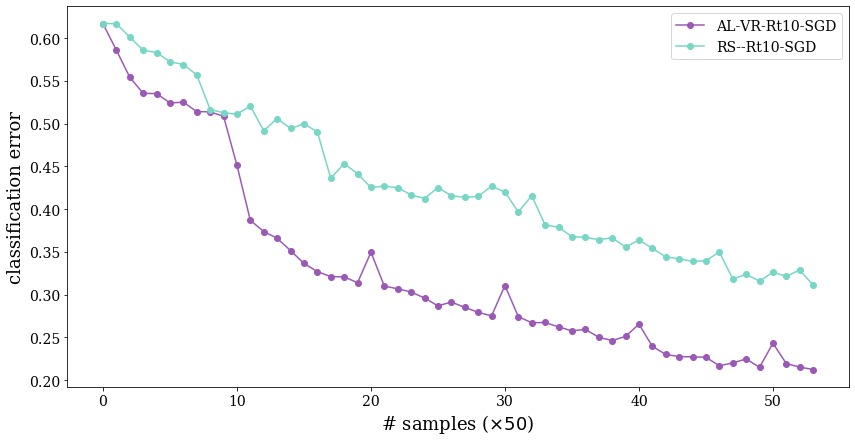

In [16]:
# 1000 initial samples
pth_1 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r70_ac1_top-k250_b32_rtAfter10_variation-ratio_adam/'
pth_2 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r70_ac0_top-k250_b32_rtAfter10/'
locs = [pth_1, pth_2]
labels = ['AL-VR-Rt10-SGD','RS--Rt10-SGD']
f_name = 'fig_k'
PlotGraph(figure_nam=f_name,data_locs=locs,labels=labels,truncate=54)

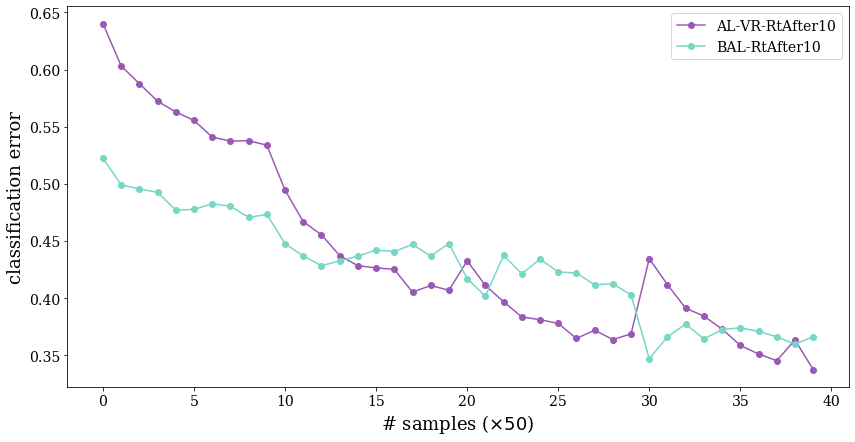

In [17]:
# Cifar10 McDropout Vs HybridBayesian
pth_1 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r40_ac1optim-Adam_top-k250_b32_rtAfter10_variation-ratio/'
pth_2 = '../results/AlexnetHybrid_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b128_mcmc5_netType-blundell_variation-ratio_rtAfter10/'
locs = [pth_1, pth_2]
labels = ['AL-VR-RtAfter10','BAL-RtAfter10']
f_name = 'fig_j'
PlotGraph(figure_nam=f_name,data_locs=locs,labels=labels,truncate=40)